<a href="https://colab.research.google.com/github/nrupu/ML/blob/main/ML0005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/student_data.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(['school', 'sex', 'age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob'], axis=1, inplace=True)

In [ ]:
df.drop(['reason','guardian'] ,axis=1, inplace=True)

In [ ]:
df.drop(['nursery'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   traveltime  395 non-null    int64
 1   studytime   395 non-null    int64
 2   failures    395 non-null    int64
 3   schoolsup   395 non-null    int64
 4   famsup      395 non-null    int64
 5   paid        395 non-null    int64
 6   activities  395 non-null    int64
 7   higher      395 non-null    int64
 8   internet    395 non-null    int64
 9   romantic    395 non-null    int64
 10  famrel      395 non-null    int64
 11  freetime    395 non-null    int64
 12  goout       395 non-null    int64
 13  Dalc        395 non-null    int64
 14  Walc        395 non-null    int64
 15  health      395 non-null    int64
 16  absences    395 non-null    int64
 17  G1          395 non-null    int64
 18  G2          395 non-null    int64
 19  G3          395 non-null    int64
dtypes: int64(20)
memory usage: 61.8 

<Axes: >

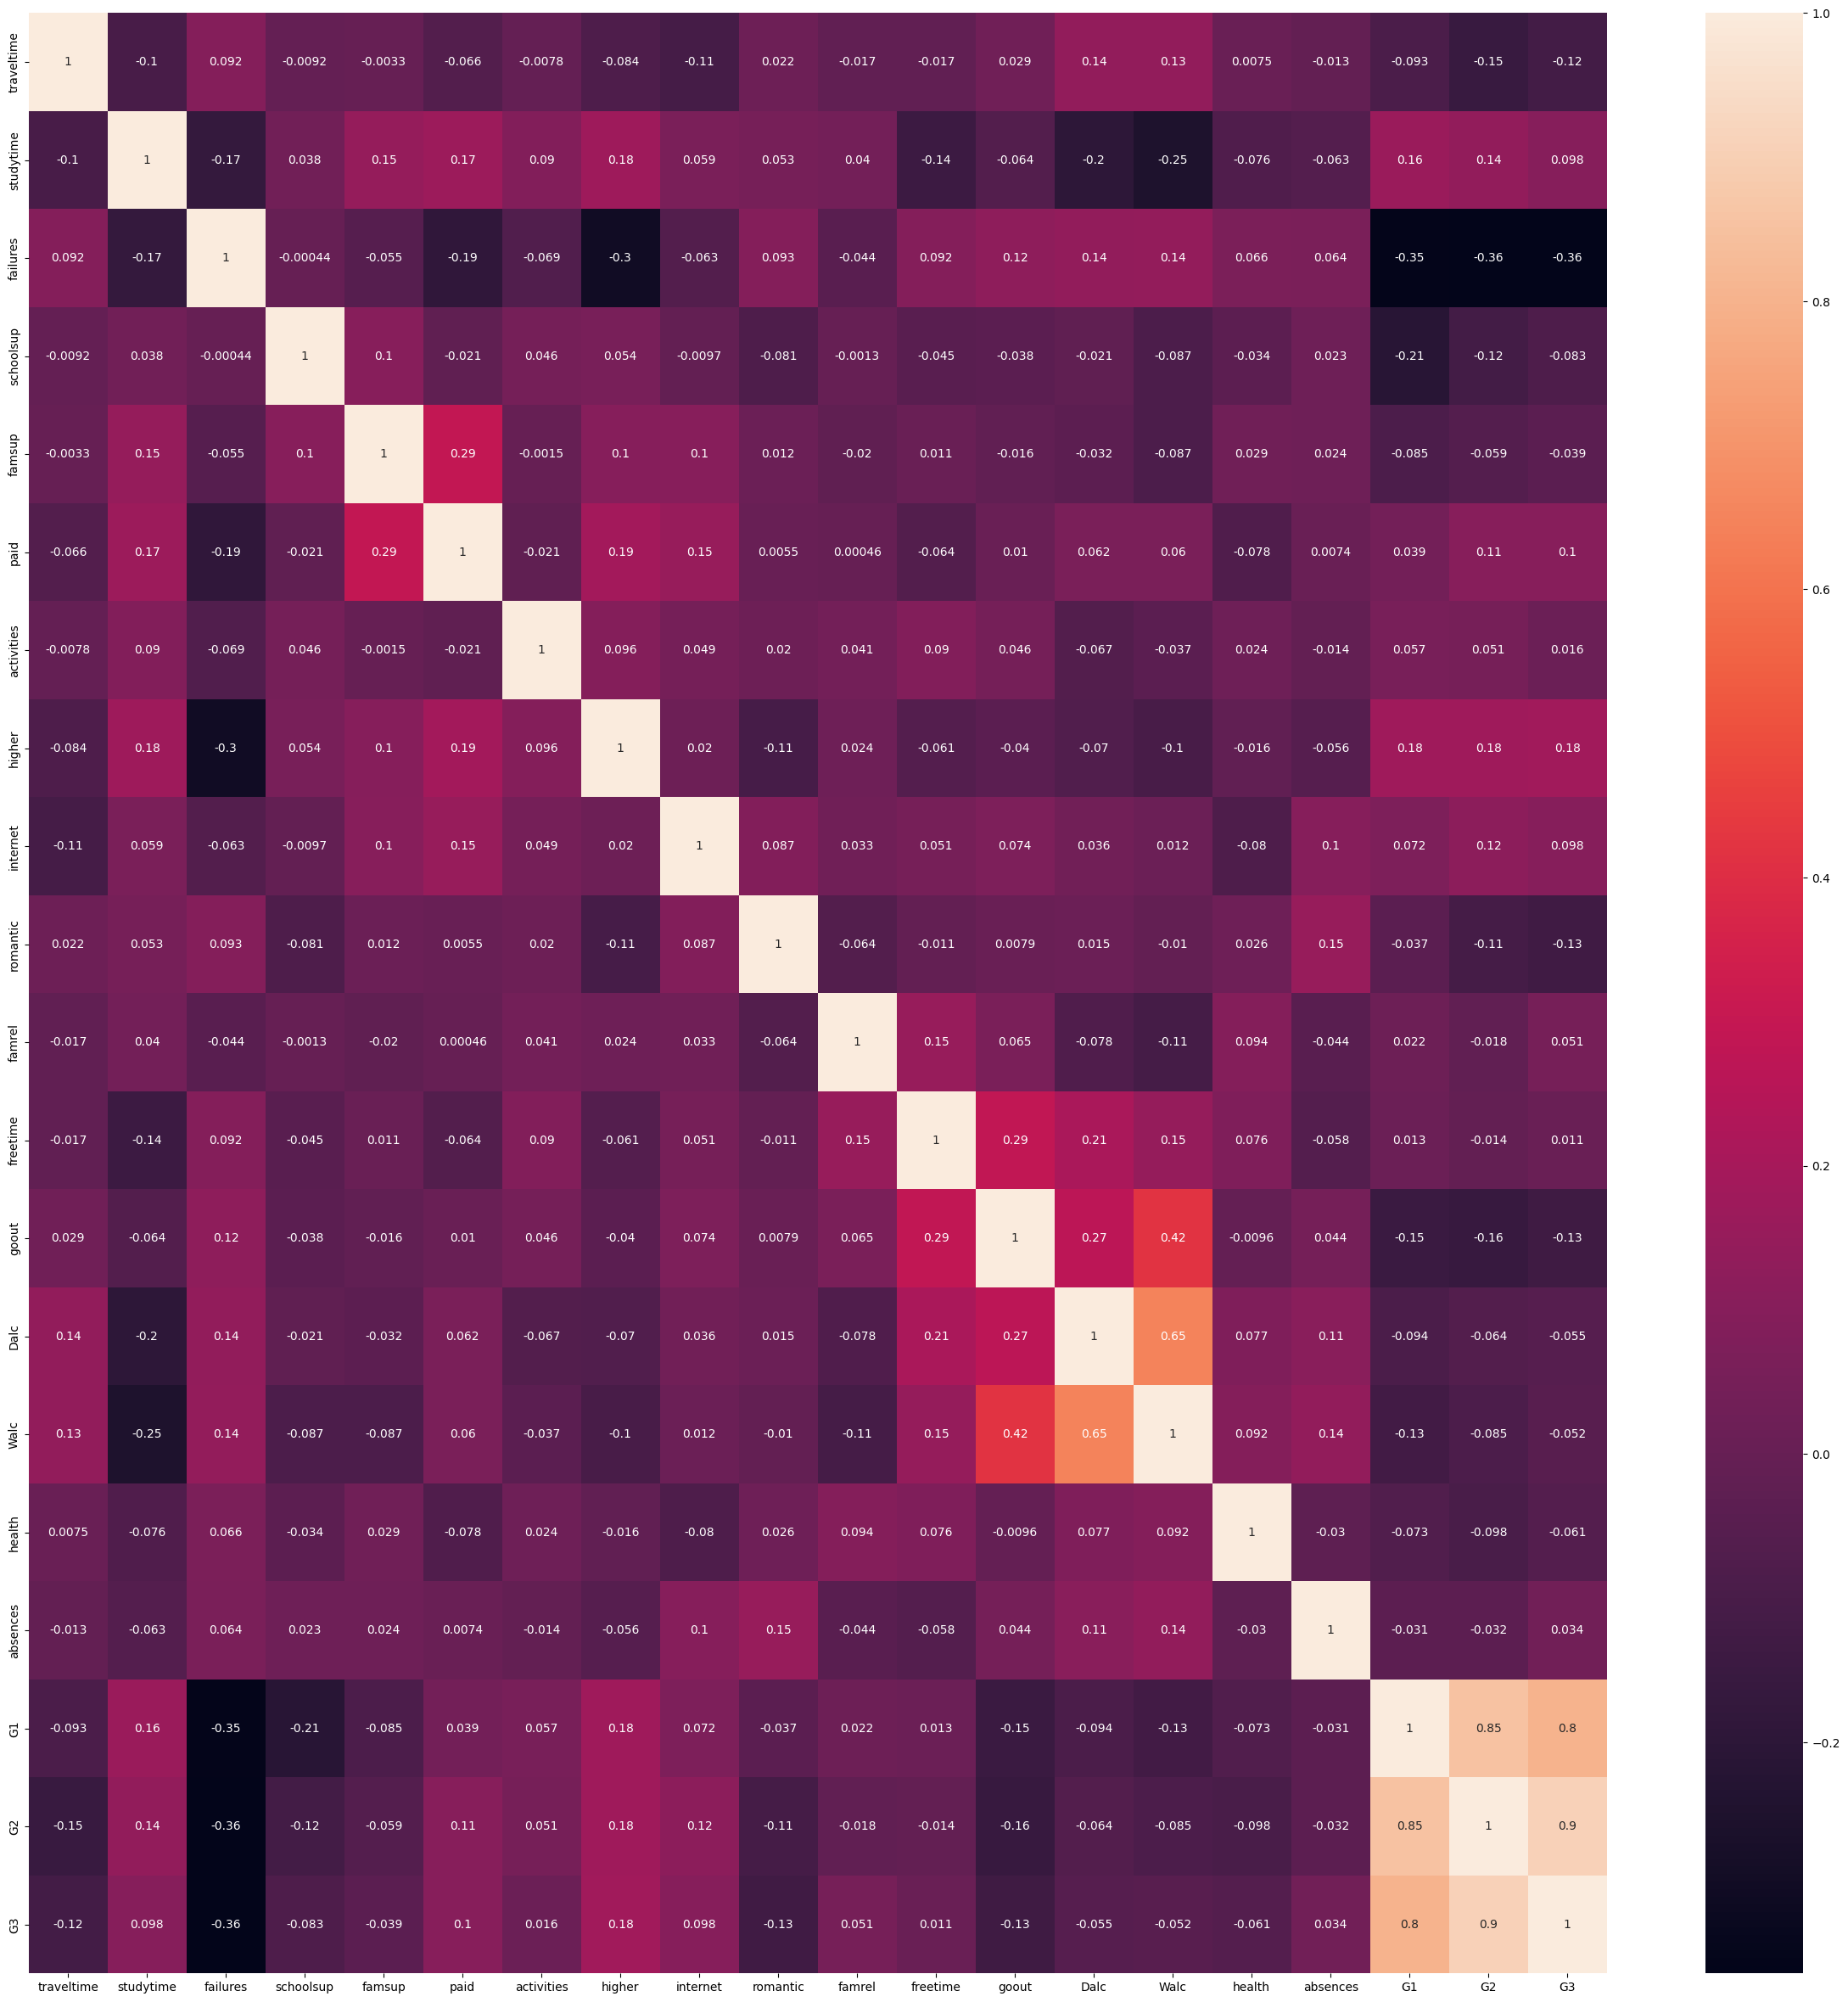

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#object to boolean
df['activities']=df['activities'].map({'yes':1,'no':0})
df['higher']=df['higher'].map({'yes':1,'no':0})
df['internet']=df['internet'].map({'yes':1,'no':0})
df['romantic']=df['romantic'].map({'yes':1,'no':0})
df['paid']=df['paid'].map({'yes':1,'no':0})

In [ ]:
df['schoolsup']=df['schoolsup'].map({'yes':1,'no':0})
df['famsup']=df['famsup'].map({'yes':1,'no':0})

In [ ]:
X = df.drop('G3', axis=1) # Changed 'price' to 'Price'
y = df['G3'] # Changed 'price' to 'Price'

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Fit the polynomial regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)
print(r2_score(y,y_pred))

0.9327647269532796
